In [1]:
from model.model import *
from utils.utils import *
from utils.dataset import *
from loss.loss import *

In [2]:
train_data_dir = '/media/zera/DATA/ImageProcessingProject/Data/Train/mfn/img'
label_data_dir = '/media/zera/DATA/ImageProcessingProject/Data/Train/mfn/label'
# Specify the paths to your training and label image directories


# Load the data using the load_data function
data_loader = load_data(train_data_dir, label_data_dir)

/home/zera/.local/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [3]:
def get_img(input):
    r1= input[0][:, 0, :, :].unsqueeze(0)
    g1 = input[0][:, 1, :, :].unsqueeze(0)
    b1 = input[1][:, 1, :, :].unsqueeze(0)
    r2 = input[1][:, 0, :, :].unsqueeze(0)    
    g2 = input[2][:, 0, :, :].unsqueeze(0)
    b2 = input[2][:, 1, :, :].unsqueeze(0)

    img1 = torch.cat([r1,g1,b1],dim = 1)
    img2 = torch.cat([r2,g2,b2],dim = 1)

    return img1,img2

In [4]:
l= torch.nn.MSELoss()

In [5]:
def ccn_loss(label_img,output):
    loss_1 = l(output[0],label_img[0])+ l(output[1],label_img[1])+ l(output[2],label_img[2])
    loss_2 =torch.mean(torch.abs(torch.angle(label_img[0]) - torch.angle(output[0])))+torch.mean(torch.abs(torch.angle(label_img[1]) - torch.angle(output[1])))+torch.mean(torch.abs(torch.angle(label_img[2]) - torch.angle(output[2])))
    loss_3 = color_relevance_loss(output,label_img)
            
            
    return loss_1+0.7*loss_2+0.1*loss_3

In [9]:
def train_CCN(ccn_model,ccn_optimizer,dataloader,epoch=2):
    for i in range(epoch):
        loss_ccn = 0
        loss_mfn = 0
        loss_den = 0
        for data in dataloader:

            input_img,input_label =data
            ccn_input = preprocess(input_img)
            ccn_labels = preprocess(input_label)  
            
            ccn_output = ccn_model(ccn_input)


            loss_1 = ccn_loss(ccn_labels,ccn_output)
            ccn_optimizer.zero_grad()
            loss_1.backward()
            ccn_optimizer.step()        
            loss_ccn +=loss_1.item()


            # im1,im2 = get_img(ccn_output)
            
            # mfn_input = im1*im2
            # mfn_output = mfn_model(mfn_input)

            # mfn_optimizer.zero_grad()
            # loss_2 = l(mfn_output,input_label)
            # loss_2.backward(retain_graph=True)
            # mfn_optimizer.step()
            

            
            
            # den_inp = arithmetic_mean_filter(mfn_output)
            # den_output = den_model(den_inp)
            
            # den_optimzer.zero_grad()
            # loss_3 = loss_1.get_den_loss(den_output,input_label)           
            # loss_3.backward(retain_graph=True)
            # den_optimzer.step()


            loss_ccn = loss_1.item()
            # loss_mfn = loss_2.item()
            # loss_den = loss_3.item()      
            


            
        
        print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
        print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
        print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 
            
            
ccn = CCN_Model()
ccn_optim = torch.optim.Adam(ccn.parameters(),lr=0.001)

train_CCN(ccn,ccn_optim,data_loader,50)

Epoch: 1 Average DEN loss: 0.0
Epoch: 1 Average MFN loss: 0.0
Epoch: 1 Average CCN loss: 1.41817307472229
Epoch: 2 Average DEN loss: 0.0
Epoch: 2 Average MFN loss: 0.0
Epoch: 2 Average CCN loss: 0.2825762629508972
Epoch: 3 Average DEN loss: 0.0
Epoch: 3 Average MFN loss: 0.0
Epoch: 3 Average CCN loss: 0.1878223419189453
Epoch: 4 Average DEN loss: 0.0
Epoch: 4 Average MFN loss: 0.0
Epoch: 4 Average CCN loss: 0.06429480016231537
Epoch: 5 Average DEN loss: 0.0
Epoch: 5 Average MFN loss: 0.0
Epoch: 5 Average CCN loss: 0.047356393188238144
Epoch: 6 Average DEN loss: 0.0
Epoch: 6 Average MFN loss: 0.0
Epoch: 6 Average CCN loss: 0.03213796019554138
Epoch: 7 Average DEN loss: 0.0
Epoch: 7 Average MFN loss: 0.0
Epoch: 7 Average CCN loss: 0.0209414754062891
Epoch: 8 Average DEN loss: 0.0
Epoch: 8 Average MFN loss: 0.0
Epoch: 8 Average CCN loss: 0.02945878356695175
Epoch: 9 Average DEN loss: 0.0
Epoch: 9 Average MFN loss: 0.0
Epoch: 9 Average CCN loss: 0.02774985507130623
Epoch: 10 Average DEN lo

In [10]:
def train_MFN(mfn_model,mfn_optimizer,dataloader,epoch=2):
    for i in range(epoch):
        loss_ccn = 0
        loss_mfn = 0
        loss_den = 0
        for data in dataloader:

            input_img,input_label =data
            ccn_input = preprocess(input_img)
            # ccn_labels = preprocess(input_label)  
            
            # ccn_output = ccn_model(ccn_input)


            # loss_1 = ccn_loss(ccn_labels,ccn_output)
            # ccn_optimizer.zero_grad()
            # loss_1.backward()
            # ccn_optimizer.step()        
            # loss_ccn +=loss_1.item()
            ccn.eval()
            with torch.no_grad():
                ccn_output = ccn(ccn_input)



            im1,im2 = get_img(ccn_output)
            
            mfn_input = im1*im2
            mfn_output = mfn_model(mfn_input)

            mfn_optimizer.zero_grad()
            loss_2 = l(mfn_output,input_label)
            loss_2.backward(retain_graph=True)
            mfn_optimizer.step()
            

            
            
            # den_inp = arithmetic_mean_filter(mfn_output)
            # den_output = den_model(den_inp)
            
            # den_optimzer.zero_grad()
            # loss_3 = loss_1.get_den_loss(den_output,input_label)           
            # loss_3.backward(retain_graph=True)
            # den_optimzer.step()


            #loss_ccn = loss_1.item()
            loss_mfn = loss_2.item()
            # loss_den = loss_3.item()      
            


            
        
        #print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
        print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
        #print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 



mfn = MFN()
mfn.train()
mfn_optim = torch.optim.Adam(mfn.parameters(),lr=0.001)
train_MFN(mfn,mfn_optim,data_loader,50)

Epoch: 1 Average MFN loss: 0.022259285673499107
Epoch: 2 Average MFN loss: 0.010120428167283535
Epoch: 3 Average MFN loss: 0.00848639477044344
Epoch: 4 Average MFN loss: 0.005417106207460165
Epoch: 5 Average MFN loss: 0.0032231220975518227
Epoch: 6 Average MFN loss: 0.007899034768342972
Epoch: 7 Average MFN loss: 0.004810600075870752
Epoch: 8 Average MFN loss: 0.0036857209634035826
Epoch: 9 Average MFN loss: 0.003821420483291149
Epoch: 10 Average MFN loss: 0.004175004083663225
Epoch: 11 Average MFN loss: 0.005886062979698181
Epoch: 12 Average MFN loss: 0.009835476987063885
Epoch: 13 Average MFN loss: 0.0032796680461615324
Epoch: 14 Average MFN loss: 0.008986481465399265
Epoch: 15 Average MFN loss: 0.03014245070517063
Epoch: 16 Average MFN loss: 0.014278885908424854
Epoch: 17 Average MFN loss: 0.06172782555222511
Epoch: 18 Average MFN loss: 0.03490791097283363
Epoch: 19 Average MFN loss: 0.01938285492360592
Epoch: 20 Average MFN loss: 0.03229102864861488
Epoch: 21 Average MFN loss: 0.06

In [14]:
def train_DEN(den_model,den_optimizer,dataloader,epoch=2):
    loss = DEN_loss()
    for i in range(epoch):
        loss_ccn = 0
        loss_mfn = 0
        loss_den = 0
        for data in dataloader:

            input_img,input_label =data
            ccn_input = preprocess(input_img)
            # ccn_labels = preprocess(input_label)  
            
            # ccn_output = ccn_model(ccn_input)


            # loss_1 = ccn_loss(ccn_labels,ccn_output)
            # ccn_optimizer.zero_grad()
            # loss_1.backward()
            # ccn_optimizer.step()        
            # loss_ccn +=loss_1.item()
            ccn.eval()
            with torch.no_grad():
                ccn_output = ccn(ccn_input)



            im1,im2 = get_img(ccn_output)            
            mfn_input = im1*im2

            mfn.eval()
            with torch.no_grad():
                mfn_output = mfn( mfn_input)
            # mfn_output = mfn_model(mfn_input)

            # mfn_optimizer.zero_grad()
            # loss_2 = l(mfn_output,input_label)
            # loss_2.backward(retain_graph=True)
            # mfn_optimizer.step()
            

            
            
            den_inp = arithmetic_mean_filter(mfn_output)
            den_output = den_model(den_inp)
            
            den_optimizer.zero_grad()
            loss_3 = loss.get_den_loss(den_output,input_label)           
            loss_3.backward()
            den_optimizer.step()


            # loss_ccn = loss_1.item()
            # loss_mfn = loss_2.item()
            loss_den = loss_3.item()      
            


            
        
        #print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
        print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
        #print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 
den = DEN()
den.train()
den_optim = torch.optim.Adam(den.parameters(),lr=0.001)
train_DEN(den,den_optim,data_loader,epoch=2)

Epoch: 1 Average MFN loss: 0.0
Epoch: 2 Average MFN loss: 0.0


In [17]:
pred = []
ccn.eval()
mfn.eval()
den.eval()

for data in data_loader:
    with torch.no_grad():
           
        input_img = preprocess(data[0])
          
        
            
        ccn_output = ccn(input_img)

        im1,im2 = get_img(ccn_output)
        mfn_output = mfn(im1*im2)
        
        den_inp = arithmetic_mean_filter(mfn_output)
        den_output = den(den_inp)
        

        

        pred.append([den_output+mfn_output,data[1]])
        
        

In [22]:
len(pred[0])

2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


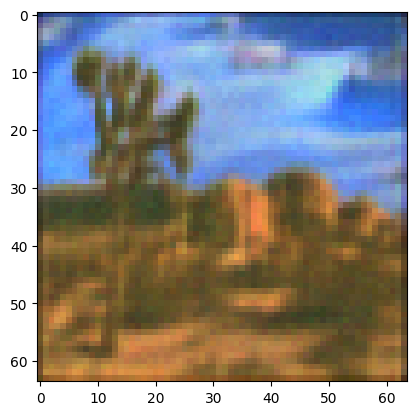

In [23]:
import matplotlib.pyplot as plt
# Assuming you have a tensor named 'image_tensor'
# First, convert the tensor to a NumPy array
image_array = pred[1][0].numpy()[0] # For PyTorch tensors
# For TensorFlow tensors, you can use: image_array = image_tensor.numpy()
image_array = image_array.transpose((1, 2, 0))
# Now, you can display the image using Matplotlib
plt.imshow(image_array)
plt.show()

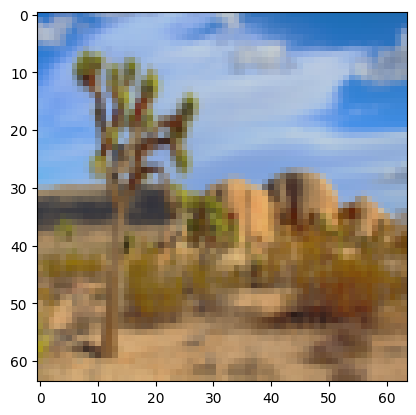

In [24]:
# Assuming you have a tensor named 'image_tensor'
# First, convert the tensor to a NumPy array
image_array = pred[1][1].numpy()[0] # For PyTorch tensors
# For TensorFlow tensors, you can use: image_array = image_tensor.numpy()
image_array = image_array.transpose((1, 2, 0))
# Now, you can display the image using Matplotlib
plt.imshow(image_array)
plt.show()